In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:496: FutureWa

Loading Data

In [2]:
dataset = pd.read_csv('C:/Users/lenovo/python_code/london_merged.csv')
dataset.head(22)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015/1/4 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015/1/4 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015/1/4 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015/1/4 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015/1/4 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3
5,2015/1/4 5:00,46,2.0,2.0,93.0,4.0,1,0,1,3
6,2015/1/4 6:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
7,2015/1/4 7:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
8,2015/1/4 8:00,131,1.5,-1.0,96.5,8.0,4,0,1,3
9,2015/1/4 9:00,301,2.0,-0.5,100.0,9.0,3,0,1,3


In [3]:
x = dataset.iloc[:,2:10]
x.head(10)

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,3.0,2.0,93.0,6.0,3,0,1,3
1,3.0,2.5,93.0,5.0,1,0,1,3
2,2.5,2.5,96.5,0.0,1,0,1,3
3,2.0,2.0,100.0,0.0,1,0,1,3
4,2.0,0.0,93.0,6.5,1,0,1,3
5,2.0,2.0,93.0,4.0,1,0,1,3
6,1.0,-1.0,100.0,7.0,4,0,1,3
7,1.0,-1.0,100.0,7.0,4,0,1,3
8,1.5,-1.0,96.5,8.0,4,0,1,3
9,2.0,-0.5,100.0,9.0,3,0,1,3


In [4]:
y = dataset.iloc[:,1]
y.head(10)

0    182
1    138
2    134
3     72
4     47
5     46
6     51
7     75
8    131
9    301
Name: cnt, dtype: int64

In [5]:
y = np.reshape(y,(-1,1))

D:\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


In [6]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [7]:
print(scaler_x.fit(x))
xscale = scaler_x.transform(x)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [8]:
print(scaler_y.fit(y))
yscale = scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))


D:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Neural Network API

In [9]:
x_train, x_test, y_train, y_test = train_test_split(xscale, yscale)

In [10]:
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(24, activation='sigmoid'))
model.add(Dense(33, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                216       
_________________________________________________________________
dense_4 (Dense)              (None, 33)                825       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 34        
Total params: 1,287
Trainable params: 1,287
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
history = model.fit(x_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 10448 samples, validate on 2612 samples
Epoch 1/150
10448/10448 [==============================]10448/10448 [==============================] - 1s 65us/step - loss: 0.0213 - mean_squared_error: 0.0213 - mean_absolute_error: 0.1112 - val_loss: 0.0139 - val_mean_squared_error: 0.0139 - val_mean_absolute_error: 0.0890

Epoch 2/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 41us/step - loss: 0.0147 - mean_squared_error: 0.0147 - mean_absolute_error: 0.0914 - val_loss: 0.0128 - val_mean_squared_error: 0.0128 - val_mean_absolute_error: 0.0813

Epoch 3/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 40us/step - loss: 0.0144 - mean_squared_error: 0.0144 - mean_absolute_error: 0.0893 - val_loss: 0.0125 - val_mean_squared_error: 0.0125 - val_mean_absolute_error: 0.0833

Epoch 4/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 40us/step - lo

10448/10448 [==============================]10448/10448 [==============================] - 0s 32us/step - loss: 0.0139 - mean_squared_error: 0.0139 - mean_absolute_error: 0.0864 - val_loss: 0.0128 - val_mean_squared_error: 0.0128 - val_mean_absolute_error: 0.0771

Epoch 31/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 38us/step - loss: 0.0138 - mean_squared_error: 0.0138 - mean_absolute_error: 0.0863 - val_loss: 0.0119 - val_mean_squared_error: 0.0119 - val_mean_absolute_error: 0.0799

Epoch 32/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 34us/step - loss: 0.0138 - mean_squared_error: 0.0138 - mean_absolute_error: 0.0862 - val_loss: 0.0120 - val_mean_squared_error: 0.0120 - val_mean_absolute_error: 0.0828

Epoch 33/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 35us/step - loss: 0.0139 - mean_squared_error: 0.0139 - mean_absolute_er

10448/10448 [==============================]10448/10448 [==============================] - 0s 39us/step - loss: 0.0137 - mean_squared_error: 0.0137 - mean_absolute_error: 0.0855 - val_loss: 0.0120 - val_mean_squared_error: 0.0120 - val_mean_absolute_error: 0.0830

Epoch 60/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 41us/step - loss: 0.0138 - mean_squared_error: 0.0138 - mean_absolute_error: 0.0858 - val_loss: 0.0119 - val_mean_squared_error: 0.0119 - val_mean_absolute_error: 0.0771

Epoch 61/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 34us/step - loss: 0.0136 - mean_squared_error: 0.0136 - mean_absolute_error: 0.0851 - val_loss: 0.0118 - val_mean_squared_error: 0.0118 - val_mean_absolute_error: 0.0784

Epoch 62/150
10448/10448 [==============================]10000/10448 [===========================>..] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137 - mean_absolute_error: 


Epoch 88/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 32us/step - loss: 0.0135 - mean_squared_error: 0.0135 - mean_absolute_error: 0.0847 - val_loss: 0.0118 - val_mean_squared_error: 0.0118 - val_mean_absolute_error: 0.0808

Epoch 89/150
10448/10448 [==============================]10350/10448 [============================>.] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136 - mean_absolute_error: 0.0810448/10448 [==============================] - 0s 34us/step - loss: 0.0136 - mean_squared_error: 0.0136 - mean_absolute_error: 0.0849 - val_loss: 0.0117 - val_mean_squared_error: 0.0117 - val_mean_absolute_error: 0.0775

Epoch 90/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 35us/step - loss: 0.0135 - mean_squared_error: 0.0135 - mean_absolute_error: 0.0846 - val_loss: 0.0117 - val_mean_squared_error: 0.0117 - val_mean_absolute_error: 0.0792

Epoch 91/150
10448/10448 [=============


Epoch 117/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 34us/step - loss: 0.0133 - mean_squared_error: 0.0133 - mean_absolute_error: 0.0840 - val_loss: 0.0115 - val_mean_squared_error: 0.0115 - val_mean_absolute_error: 0.0794

Epoch 118/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 37us/step - loss: 0.0133 - mean_squared_error: 0.0133 - mean_absolute_error: 0.0836 - val_loss: 0.0115 - val_mean_squared_error: 0.0115 - val_mean_absolute_error: 0.0769

Epoch 119/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 34us/step - loss: 0.0133 - mean_squared_error: 0.0133 - mean_absolute_error: 0.0839 - val_loss: 0.0115 - val_mean_squared_error: 0.0115 - val_mean_absolute_error: 0.0794

Epoch 120/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 39us/step - loss: 0.0133 - mean_squared_error: 0.0133 


Epoch 146/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 35us/step - loss: 0.0132 - mean_squared_error: 0.0132 - mean_absolute_error: 0.0836 - val_loss: 0.0115 - val_mean_squared_error: 0.0115 - val_mean_absolute_error: 0.0762

Epoch 147/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 32us/step - loss: 0.0132 - mean_squared_error: 0.0132 - mean_absolute_error: 0.0835 - val_loss: 0.0117 - val_mean_squared_error: 0.0117 - val_mean_absolute_error: 0.0822

Epoch 148/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 34us/step - loss: 0.0133 - mean_squared_error: 0.0133 - mean_absolute_error: 0.0835 - val_loss: 0.0116 - val_mean_squared_error: 0.0116 - val_mean_absolute_error: 0.0817

Epoch 149/150
10448/10448 [==============================]10448/10448 [==============================] - 0s 36us/step - loss: 0.0132 - mean_squared_error: 0.0132 

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


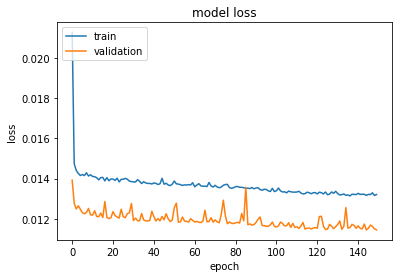

In [13]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Prediction

In [14]:
xnew = np.array([[1,-1,100,7,4,0,1,3]])
xnew = scaler_x.transform(xnew)

In [15]:
ynew = model.predict(xnew)

In [16]:
ynew = scaler_y.inverse_transform(ynew)
xnew = scaler_x.inverse_transform(xnew)

In [17]:
print("x=%s,Predicted = %s"%(xnew[0],ynew[0]))

x=[  1.  -1. 100.   7.   4.   0.   1.   3.],Predicted = [305.03143]
